# Boston Housing Problem - ML Project 1
In this notebook I will document my first ML project using the famous Boston Housing Problem

In [37]:
# Importing Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline


In [38]:
from sklearn.datasets import load_boston
boston = load_boston()

In [39]:
#Getting to know the dataset
print('The dataset is of ' + str(type(boston)) + ' type')

# print(boston.keys())
# print(boston.DESCR)

The dataset is of <class 'sklearn.utils.Bunch'> type


`boston.data` # variable names   
`boston.target` #regression target   
`boston.feature_names` # feature names ie, variables  
`boston.DESCR` # description of the features  
`boston.filename` # file where all is stored

In [40]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()
features = df.keys()

In [41]:
#chekcing for NULL values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

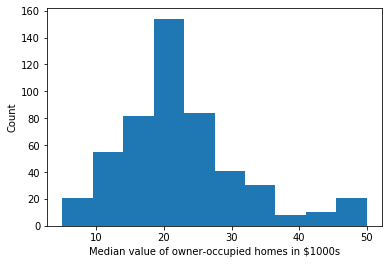

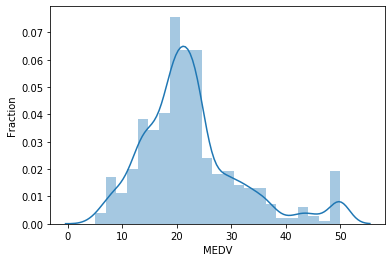

In [42]:
#MEDV is the target
df['MEDV'] = boston.target
plt.figure()
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Count')
plt.hist( df['MEDV'])

plt.figure()
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Fraction')
sns.distplot(df['MEDV'])

(14, 0)

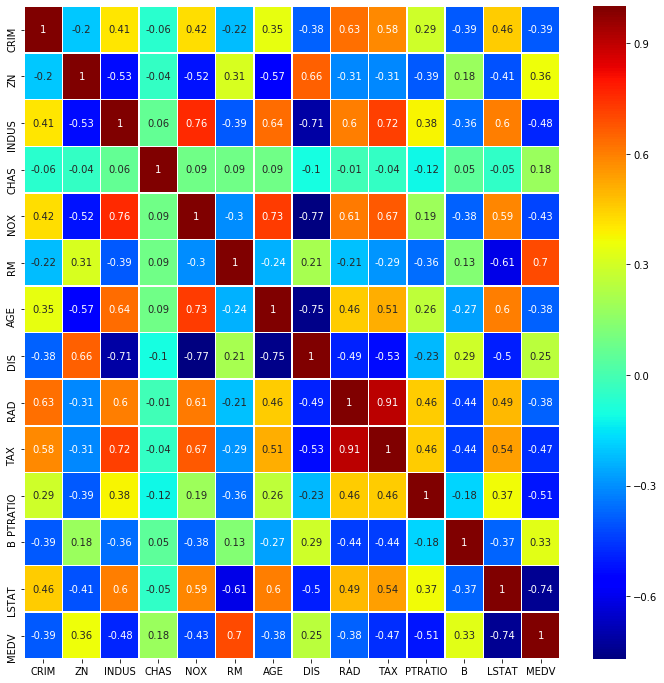

In [43]:
#Trying to understand correlations between different variables
correlation = df.corr().round(2) 
N = len(correlation)

# fig, ax = plt.subplots(figsize=(12,12))
# im = ax.imshow(correlation, cmap='jet')
# cbar = ax.figure.colorbar
# ax.set_xticks(np.arange(df.shape[1]))
# ax.set_yticks(np.arange(df.shape[1]))
# ax.set_xticklabels(df.keys())
# ax.set_yticklabels(df.keys())
# ax.set_title('Correlation Matrix')
# for i in range(N):
#     for j in range(N):
#         ax.annotate(str(correlation.iloc[i,j]), xy=(i,j))

# OR       

plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation.round(2), annot=True, linewidths=.5, cmap='jet')
ax.set_ylim(N, 0) 

# Observations
First I talk about how MEDV (Median value of owner-occupied homes in \$ 1000s) is influenced by other features
## Correlations with MEDV 
1. `RM` (average number of rooms per dwelling) has strong positive correlation (0.7) with MEDV. In other words as the average number of rooms increase, the price of the homes also increase.
2. `LSTAT` (\% of status of the population) has a strong negative correlation (-0.74) with MEDV i.e, if the status of the population is perceived to be lower, the price becomes lower
3. `PTRATIO` (pupil-teacher ratio by town) has a not so small correlation (0.5) on the price

## Correlations among the features
It is also interesting to notice that there is strong correlation among some of the features themselves. They are listed below:
### Positively correlated
1. `RAD` vs. `TAX` (0.91)
2. `AGE` vs. `RM` (0.73)
3. `INDUS` vs. `TAX` (0.72)
4. `RAD` vs. `CRIM` (0.63)
5. `RAD` vs. `NOX` (0.61)
### Negatively correlated
1. `DIS` vs. `NOX` (-0.77)
2. `DIS` vs. `AGE` (-0.75)
3. `DIS` vs. `INDUS` (-0.71)

Hence one should be careful not to select these variables together for fitting

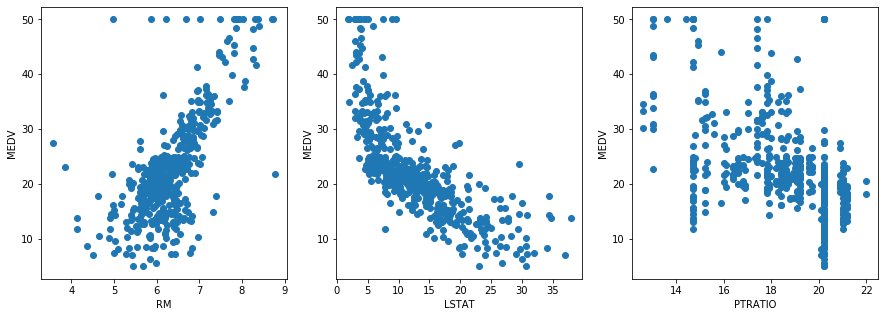

In [44]:
# Using a scatter plot to visualize the correlation
features = ['RM', 'LSTAT', 'PTRATIO']

plt.figure(figsize=(15,5))
for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    f = df[col]
    plt.scatter(f, df['MEDV'])
    plt.ylabel('MEDV')
    plt.xlabel(col)

From the above figures it is clear that `RM` has a visible positive correlation with `MEDV` and `LSTAT` has a negative correlation. `PTRATIO` doesn't seem to have a clear correlation. So it is avoided from the features.

# Linear Regression

In this case we try to create a model for predicting the house prices using Linear Regression models.

In [45]:
#Model Fitting - we ignore PTRATIO as it does not give a clear correlation
features=['RM', 'LSTAT']
#Testing and training begins
from sklearn.model_selection import train_test_split

X = df[features]
Y = df['MEDV']
# print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4422)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation
In this part, we will evaluate the model using RMSE and $R^2$.

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Y_train_eval = clf.predict(X_train)
N_train = len(X_train)
dev = (Y_train - Y_train_eval);
rmse_train = np.sqrt( np.sum(dev**2)/N_train).round(4)
# rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_eval)).round(4)

r2_train = (1 - np.sum(dev**2)/np.sum((Y_train - np.mean(Y_train))**2)).round(4)
# r2_train = r2_score(Y_train, Y_train_eval).round(4)

adj_r2_train = (1 - (1-r2_train)*(N_train - 1)/(N_train - len(features) - 1)).round(4)
print('RMSE is {}'.format(rmse_train))
print('R-squared is {}'.format(r2_train))
print('Adjusted R-squared is {}'.format(adj_r2_train))

RMSE is 5.6269
R-squared is 0.6346
Adjusted R-squared is 0.6327


The R-squared and adjusted R-squared values above say that: More than 60% of the time, this model can make accurate predictions.

## Testing and Evaluation
Now we test the model and look at its accuracy.

In [47]:
Y_test_eval = clf.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_eval)).round(4)
r2_test = r2_score(Y_test, Y_test_eval).round(4)
N_test = len(Y_test)
adj_r2_test = (1 - (1-r2_test)*(N_test-1)/(N_test - len(features) - 1)).round(4)
print('RMSE is {}'.format(rmse_test))
print('R-squared is {}'.format(r2_test))
print('Adjusted R-squared is {}'.format(adj_r2_test))

RMSE is 5.2312
R-squared is 0.6463
Adjusted R-squared is 0.6406


The above results are close to the values obtained from the evaluation of the training dataset i.e, more than 60 \% of the times, the model will be accurate.

# Polynomial Regression
If one looks closely, it is clear that the dependence of `MEDV` on `LSTAT` is not linear but of second degree. Hence we explore this relationship.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# defines the polynomial degree
poly_fit = PolynomialFeatures(degree=2)

# transform the features to higher degree features.
X_train_poly = poly_fit.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
r2_long = r2_score(y_train_predicted, Y_train).round(4)

# Now simplifying the whole process using pipeline
pipein = [('polynomial',PolynomialFeatures(degree=2)), ('model',LinearRegression())]
pipe = Pipeline(pipein)
pipe.fit(X_train, Y_train)
y_train_pipe = pipe.predict(X_train)
r2_pipe = r2_score(y_train_pipe, Y_train).round(4)

print(r2_pipe, r2_long)

0.6709 0.6709


Now testing how good the model is using the test data:

In [49]:
y_test_poly = pipe.predict(X_test)
r2_test_poly = r2_score(Y_test, y_test_poly).round(4)

print(r2_test_poly)

0.7676


In this model, by looking at $R^2$ values, we see that the accuracy of the model has improved by using polynomial regression. However, one should be careful to choose the number of features and the degree of polynomial for fitting. That's why testing the model using the test data is necessary. Though it may lead to higher accuracy (ie, $R^2$ values), it doesn't mean that the model is better. It just means that the model fits well with the given dataset.

In the above cells, we also saw that how a model can be implimented much more easily using a pipeline.


# Is `PTRATIO` important?

Earlier we saw that `PTRATIO` has a reasonable amount of correlation. However, when we plotted the scatter diagram the correlation was no more clear. Now we test whether including `PTRATIO` improves the fit.

In [50]:
features = ['RM', 'LSTAT', 'PTRATIO']
X3 = df[features]

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, random_state=4422)
pipein3 = [('poynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe3 = Pipeline(pipein3)
pipe3.fit(X3_train, Y3_train)
y3_train_pred = pipe3.predict(X3_train)
r23_train = r2_score(Y3_train, y3_train_pred).round(4)

y3_test_pred = pipe3.predict(X3_test)
r23_test = r2_score(Y3_test, y3_test_pred).round(4)
print(r23_train, r23_test)


0.7981 0.7877


These parameters indicate that with `PTRATIO` there is a small improvement. So we need to take many cases to see if `PTRATIO` really makes it better. For this, we do `N_samples` number of simulations under the null hypothesis that the model with `PTRATIO` as a feature is just as accurate as the one without it. Under this null hypothesis, we calculate the differences of the $R^2$ values `r2_3` (incl. `PTRATIO`) and `r2_2` (without `PTRATIO`) as the test statistic and carry out the simulaitons.

In [51]:
N_samples = 5000
r2_3 = np.empty(N_samples)
r2_2 = np.empty(N_samples)
r2_diff = np.empty(N_samples)
for i in range(N_samples):
    jj=np.random.randint(0,50000)
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, random_state=jj)
    y3_test_pred = pipe3.predict(X3_test)
    r2_3[i] = r2_score(Y3_test, y3_test_pred)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, random_state=jj)
    y2_test_pred = pipe.predict(X2_test)
    r2_2[i] = r2_score(Y2_test, y2_test_pred)
    r2_diff[i] = r2_3[i] - r2_2[i]

# print("Mean R^2  for 3 variables: " , np.mean(r2_3), "; for 2 variables :" ,np.mean(r2_2))
# np.sum(r2_2 > np.mean(r2_3))/N_samples
p_val = np.sum(r2_diff <= 0)/N_samples
print(p_val)

0.031


From looking at the `p_val` (which is lower than the standard significance level of 0.05), we can say that the model with `PTRATIO` as a feature is superior than the model with `PTRATIO` as a feature.

# Conclusions and Market Insights
From the model, the following conclusions could be said about the buyer behaviour.
1. The perception of status play an important role in the purchase. The buyer doesn't want to be seen as of lower status, which in their view affect their future prospects.
2. Average number of rooms is directly proportional to the price of the house. This is straight forward.
3. A not-so-insignificant section of buyers take the future education of their children into consideration while buying houses.